#Bibliotecas

In [1]:
!pip install plotly --upgrade

     |████████████████████████████████| 13.2MB 262kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [2]:
pip install pandas-datareader

In [9]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Web scrapping data set


DATA SET HISTORICO COMPLETO DA AMBEV

In [14]:

ambev_df = data.DataReader(name = 'ABEV3.SA', data_source = 'yahoo', start = '2015-01-01')
ambev_df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2015-01-02,16.559999,15.770000,16.139999,16.020000,19396500.0,12.619536
2015-01-05,15.970000,15.540000,15.910000,15.730000,13795900.0,12.391089
2015-01-06,16.420000,15.560000,15.730000,16.330000,18610500.0,12.863731
2015-01-07,16.719999,16.139999,16.340000,16.559999,20493500.0,13.044909
2015-01-08,16.680000,16.260000,16.430000,16.540001,9054500.0,13.830949
...,...,...,...,...,...,...
2021-05-17,17.530001,17.100000,17.230000,17.400000,16843500.0,17.400000
2021-05-18,17.590000,17.260000,17.350000,17.420000,15746000.0,17.420000
2021-05-19,17.600000,17.330000,17.370001,17.559999,17538900.0,17.559999


#IMPORTANDO VÁRIAS AÇÕES E SEUS PREÇOS DE FECHAMENTO

In [44]:
acoes = ['ABEV3.SA' , 'ODPV3.SA', 'VIVT3.SA', 'PETR4.SA', 'BBAS3.SA', '^BVSP']
acoes_df = pd.DataFrame()
for acao in acoes:
  acoes_df[acao] = data.DataReader(acao, data_source='yahoo', start='2015-01-01')['Close']

In [45]:
acoes_df

,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR4.SA,BBAS3.SA,^BVSP
Date,,,,,,
2015-01-02,16.020000,9.37,37.820000,9.360000,22.650000,48512.0
2015-01-05,15.730000,9.62,37.070000,8.560000,22.180000,47517.0
2015-01-06,16.330000,9.55,36.150002,8.280000,22.490000,48001.0
2015-01-07,16.559999,9.69,37.389999,8.670000,23.480000,49463.0
2015-01-08,16.540001,9.66,38.910000,9.230000,23.559999,49943.0
...,...,...,...,...,...,...
2021-05-17,17.400000,13.15,43.189999,26.660000,31.709999,122938.0
2021-05-18,17.420000,13.05,43.119999,26.350000,32.150002,122980.0
2021-05-19,17.559999,13.10,43.950001,26.150000,32.700001,122636.0


#Identificando valores nulos

In [46]:
acoes_df.isnull().sum()

ABEV3.SA    0
ODPV3.SA    0
VIVT3.SA    0
PETR4.SA    0
BBAS3.SA    0
^BVSP       6
dtype: int64

#Salvando o Banco de Dados

In [47]:
acoes_df.to_csv('acoes.csv')

#Visualizações

In [59]:
acoes_df = pd.read_csv('acoes.csv')
acoes_df

,Date,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR4.SA,BBAS3.SA,^BVSP
0,2015-01-02,16.020000,9.37,37.820000,9.360000,22.650000,48512.0
1,2015-01-05,15.730000,9.62,37.070000,8.560000,22.180000,47517.0
2,2015-01-06,16.330000,9.55,36.150002,8.280000,22.490000,48001.0
3,2015-01-07,16.559999,9.69,37.389999,8.670000,23.480000,49463.0
4,2015-01-08,16.540001,9.66,38.910000,9.230000,23.559999,49943.0
...,...,...,...,...,...,...,...
1577,2021-05-17,17.400000,13.15,43.189999,26.660000,31.709999,122938.0
1578,2021-05-18,17.420000,13.05,43.119999,26.350000,32.150002,122980.0
1579,2021-05-19,17.559999,13.10,43.950001,26.150000,32.700001,122636.0
1580,2021-05-20,17.540001,13.00,43.779999,25.930000,32.799999,122701.0


In [48]:
acoes_df.head()

,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR4.SA,BBAS3.SA,^BVSP
Date,,,,,,
2015-01-02,16.020000,9.37,37.820000,9.36,22.650000,48512.0
2015-01-05,15.730000,9.62,37.070000,8.56,22.180000,47517.0
2015-01-06,16.330000,9.55,36.150002,8.28,22.490000,48001.0
2015-01-07,16.559999,9.69,37.389999,8.67,23.480000,49463.0
2015-01-08,16.540001,9.66,38.910000,9.23,23.559999,49943.0


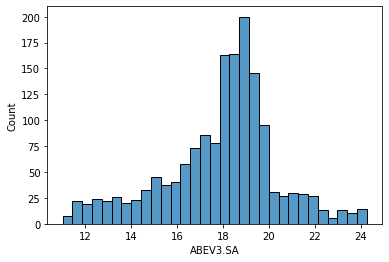

In [49]:
sns.histplot(acoes_df['ABEV3.SA'])


#Varias ações ao mesmo tempo e seus comparativos

#Histograma

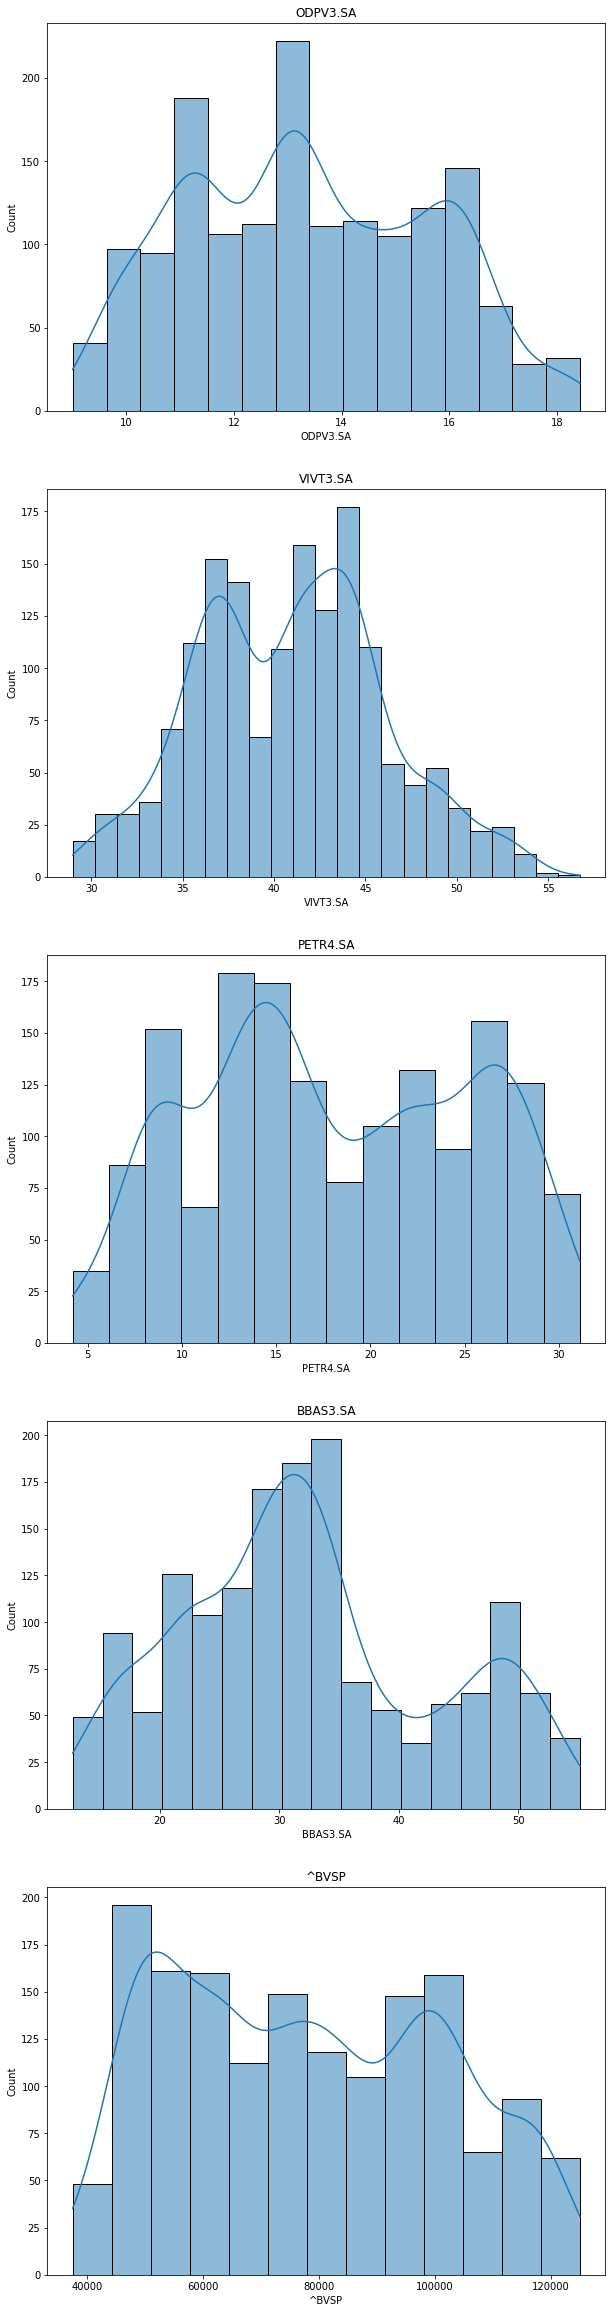

In [52]:
plt.figure(figsize= (10, 50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(6, 1, i + 1) #7 número de linhas(que será de 6)e 1 número de colunas
  sns.histplot(acoes_df[acoes_df.columns[i]], kde = True)
  plt.title(acoes_df.columns[i])



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

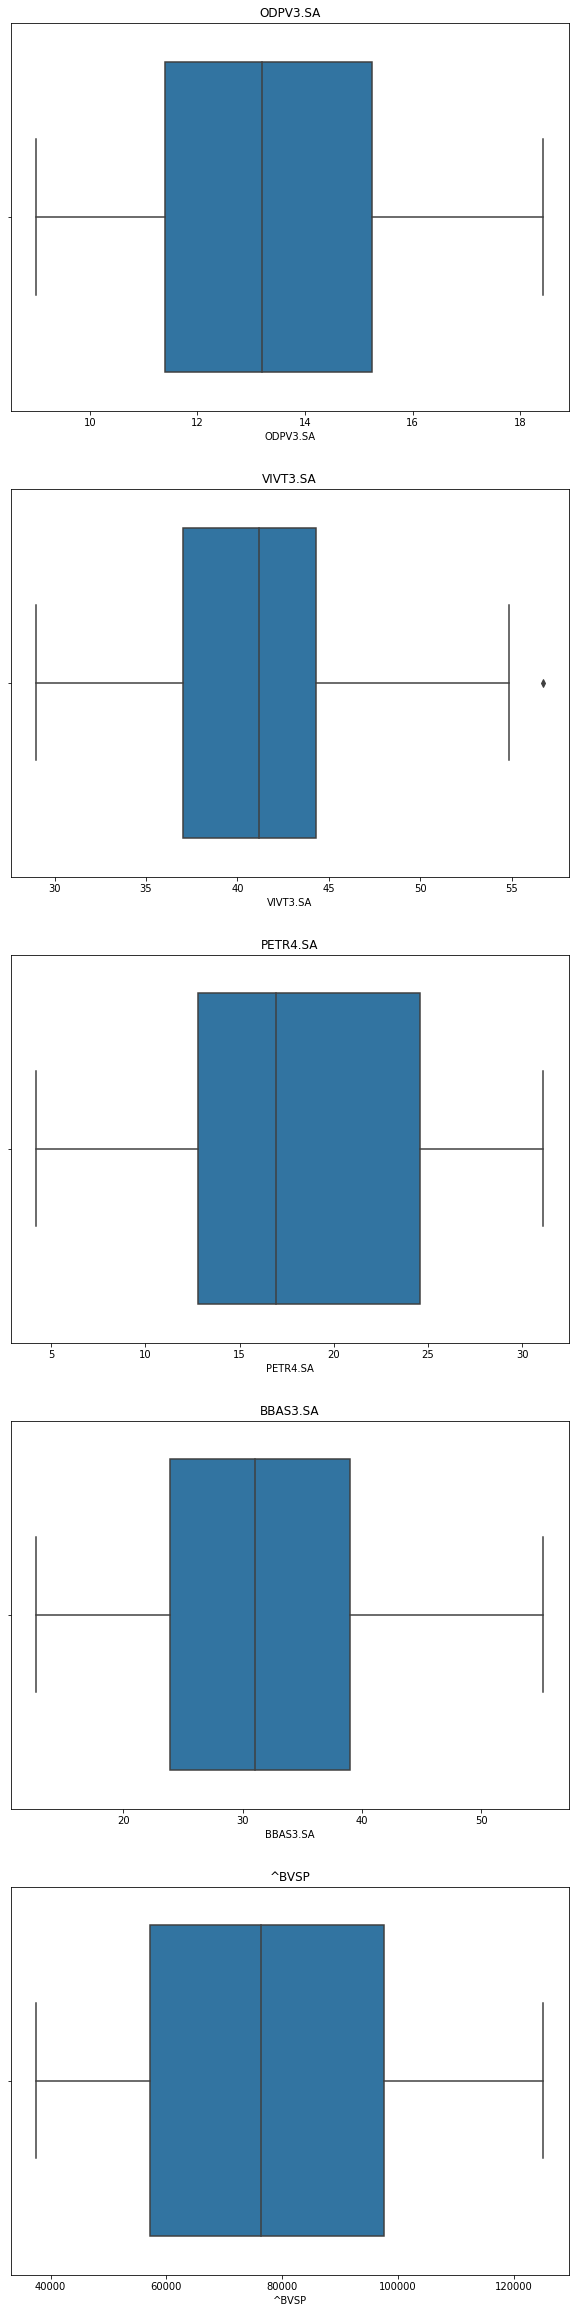

In [55]:
plt.figure(figsize= (10, 50))
i = 1
for i in np.arange(1, len(acoes_df.columns)):
  plt.subplot(6, 1, i + 1) #7 número de linhas(que será de 6)e 1 número de colunas
  sns.boxplot(acoes_df[acoes_df.columns[i]])
  plt.title(acoes_df.columns[i])


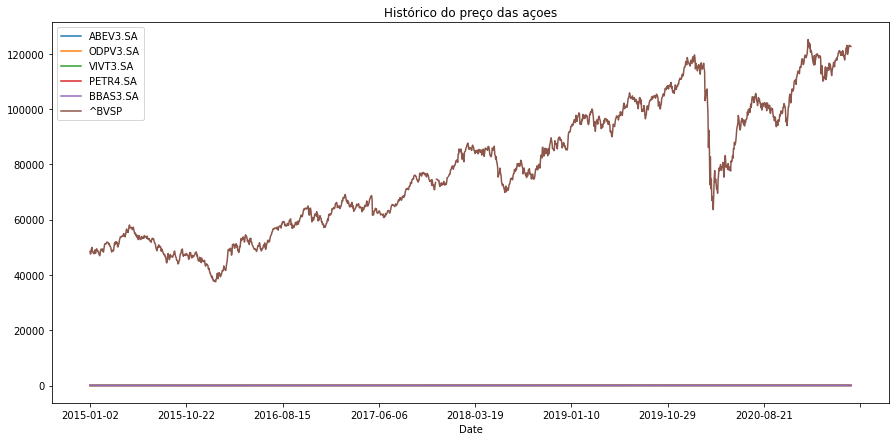

In [60]:
acoes_df.plot(x = 'Date', figsize= (15,7), title = 'Histórico do preço das açoes');

#Normalizando os valores

Aqui a missão é colocar todos os valores partindo do 0. Assim fica possível uma comparação mais justa das movimentações e do crescimento das ações.

In [ ]:
#divisão de cada valor pelo valor inicial
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] /acoes_df_normalizado[i][0]

In [61]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns[1:]:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]

In [62]:
acoes_df_normalizado

,Date,ABEV3.SA,ODPV3.SA,VIVT3.SA,PETR4.SA,BBAS3.SA,^BVSP
0,2015-01-02,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,2015-01-05,0.981898,1.026681,0.980169,0.914530,0.979249,0.979490
2,2015-01-06,1.019351,1.019210,0.955844,0.884615,0.992936,0.989467
3,2015-01-07,1.033708,1.034152,0.988630,0.926282,1.036645,1.019603
4,2015-01-08,1.032459,1.030950,1.028821,0.986111,1.040177,1.029498
...,...,...,...,...,...,...,...
1577,2021-05-17,1.086142,1.403415,1.141988,2.848291,1.400000,2.534177
1578,2021-05-18,1.087391,1.392743,1.140137,2.815171,1.419426,2.535043
1579,2021-05-19,1.096130,1.398079,1.162084,2.793803,1.443709,2.527952
1580,2021-05-20,1.094881,1.387407,1.157589,2.770299,1.448124,2.529292


#Vizualisação com Gráficos Normalizados

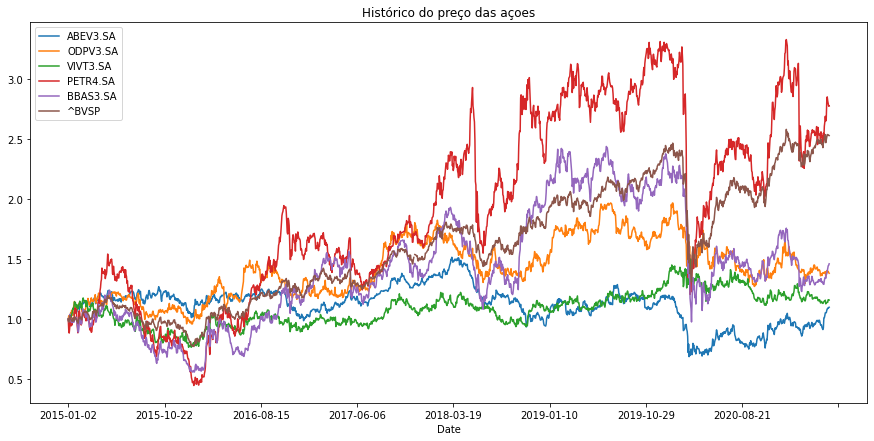

In [63]:
acoes_df_normalizado.plot(x = 'Date', figsize= (15,7), title = 'Histórico do preço das açoes');

#Normalizado iterativo - Gráfico de linha interativo

In [64]:
figura = px.line(title='Histórico preço das ações')
for i in acoes_df_normalizado.columns[1:]:
  figura.add_scatter(x = acoes_df_normalizado['Date'], y = acoes_df_normalizado[i], name = i)
figura.show()